In [761]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [762]:
#path = "https://raw.githubusercontent.com/BhargavPalaketi/MachineLearning/main/SupervisedLearning/Regression/Multivariate%20Regression/Datasets/kc_house_data.csv"
#data = pd.read_csv(path)
#data.head()

In [763]:
url ="https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv"
data = pd.read_csv(url,header=None)
df = data

In [764]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [765]:
correlation_matrix = data.corr()
correlation_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
1,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
2,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
3,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
4,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
5,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
6,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
7,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
8,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
9,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [766]:
data.dtypes

0     float64
1     float64
2     float64
3       int64
4     float64
5     float64
6     float64
7     float64
8       int64
9     float64
10    float64
11    float64
12    float64
13    float64
dtype: object

Text(0, 0.5, 'price')

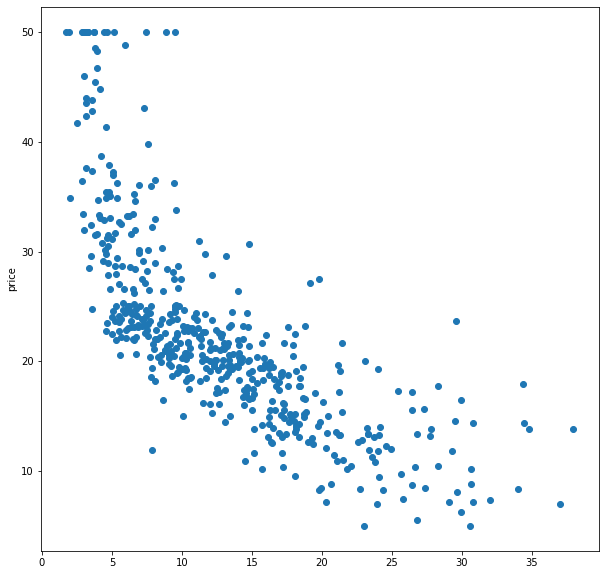

In [767]:
plt.figure(figsize=(10,10))
plt.plot(data[12],data[13],'o')
plt.ylabel('price')

In [768]:
# kc house data set
#data = data.drop(['id','date'], axis =1)
#print(data.shape)
#data.head()

In [769]:
#X = data.iloc[:, data.columns != 'price'] 
#y = data['price']

In [770]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]


In [771]:
print(y.shape)
#print(y_g.shape)

(506,)


In [772]:
print(X.shape)
X.head()

(506, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


 ## <p> Hypothesis: Since we have multiple independent features we need to use multivariate Regression <br> hypothesis look like ℎ𝜃(x) = 𝜃0x0 + 𝜃1x1 + 𝜃2𝑥2 + 𝜃3𝑥3 + ⋯ + 𝜃𝑛𝑥𝑛

In [773]:
#X.shape[0]
#X_0 = np.c_[np.ones((X.shape[0],1)),X]
#X_0.shape

In [774]:
#X_0

 ### Normal Equation <br>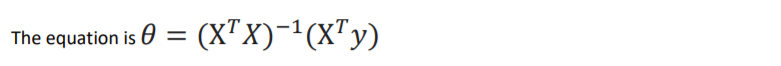

In [775]:
def normalequation(X,y):
  #pinv = (X^T*X)^-1*X^T
  pinv = np.linalg.inv(np.matmul(X.T,X))
  ne = np.matmul(pinv,np.matmul(X.T,y))
  return ne

 ### Split data  

In [776]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split( X, y, random_state = 0 )

In [777]:
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

In [778]:
X_train_0.shape

(379, 14)

In [779]:
theta = normalequation(X_train_0,y_train)
theta.shape

(14,)

In [780]:
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [781]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,36.933255,36.933255
1,theta_1,0,-0.117735,-0.117735
2,theta_2,1,0.044017,0.044017
3,theta_3,2,-0.005768,-0.005768
4,theta_4,3,2.393416,2.393416
5,theta_5,4,-15.589421,-15.589421
6,theta_6,5,3.768968,3.768968
7,theta_7,6,-0.007035,-0.007035
8,theta_8,7,-1.434956,-1.434956
9,theta_9,8,0.240081,0.240081


In [782]:
print(X_train.shape)
print(theta.shape)

(379, 13)
(14,)


In [783]:
def hypothesis(X,theta):
  f = np.matmul(X,theta)
  return f


In [784]:
y_pred_norm = hypothesis(X_test_0,theta) 

In [785]:
J_mse = np.sum((y_pred_norm - y_test)**2)/(2*X_test.shape[0]) 

# R_square 
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  14.891122546150696
R square obtain for normal equation method is : 0.6354638433202249


 # Using Gradient descent python implementation 

In [786]:
def costfunction(X,y,theta):
  m = X.shape[0] #no:of training examples
  h = X.dot(theta)
  J = np.sum((y - h)**2)/(2*m)
  return J

In [787]:
def batch_gradient_descent(X,y,theta,alpha,epochs):
  cost_history = [0]*epochs
  m = len(y)

  for epoch in range(epochs):
    h = X.dot(theta) #hypothesis predicted value
    loss = h-y #loss
    #Gradient calculation
    gradient = X.T.dot(loss) / m

    #Updating theta values
    theta = theta - alpha * gradient

    # new Cost value
    cost = costfunction(X,y,theta)
    cost_history[epoch] = cost
  return theta,cost_history 




In [788]:
X_g = df.iloc[:,:-1]
y_g = df.iloc[:,-1]
y_g.shape
X_g.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [789]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X_g)

In [790]:
from sklearn.model_selection import train_test_split
X_g_train,X_g_test,y_g_train,y_g_test = train_test_split( X_std, y_g, random_state = 0 )

In [791]:
X_g_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_g_train]
X_g_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_g_test]
y_g_train = y_g_train.values.reshape(-1,1)

In [792]:
theta_g = np.ones((X_g_train_0.shape[1],1))

In [793]:
print('X shape: ',X_g_train_0.shape)
print('theta shape: ', theta_g.shape)
print('y.shape: ',y_g_train.shape)

X shape:  (379, 14)
theta shape:  (14, 1)
y.shape:  (379, 1)


In [794]:
 h = np.matmul(X_g_train_0,theta_g)
 np.square(y_g_train - h).shape

(379, 1)

In [795]:
cost = costfunction(X_g_train_0,y_g_train,theta_g)
cost

306.25757653438984

In [796]:
#cost_hist, theta_hist, theta_g_cal = Linear_reg_gradient_descent(X_g_train_0,y_g_train,theta_g,0.001,1000)

In [797]:
epochs = 3000
alpha = 0.03

In [798]:
theta_g_cal, cost_history_g = batch_gradient_descent(X_g_train_0,y_g_train,theta_g,alpha,epochs) 

In [799]:
theta_g_cal

array([[22.40888818],
       [-1.01129848],
       [ 1.02493657],
       [-0.04167361],
       [ 0.60760794],
       [-1.8040347 ],
       [ 2.64588168],
       [-0.19820357],
       [-3.01861665],
       [ 2.08338599],
       [-1.89658965],
       [-2.13132078],
       [ 0.77004485],
       [-3.56058341]])

In [800]:
new_cost = costfunction(X_g_train_0,y_g_train,theta_g_cal)
new_cost

9.820261700198678

In [801]:
print(X_train_0.shape)
print(y_train.shape)
print(costfunction(X_g_train_0,y_g_train,theta_g))
print(hypothesis(X_train_0,theta_g)[3])

(379, 14)
(379,)
306.25757653438984
[1254.80645]


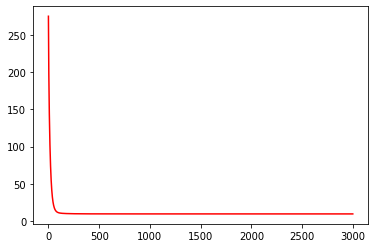

In [802]:
#plt.plot(cost_history_g,epochs)
plt.plot(list(range(epochs)), cost_history_g, '-r')

In [803]:
y_ = hypothesis(X_g_test_0,theta_g_cal)

In [804]:
def r2(y_,y):
 sst = np.sum((y-y.mean())**2)
 ssr = np.sum((y_-y)**2)
 r2 = 1-(ssr/sst)
 return(r2)
#----------------
print('r2 score using gradient descent: ',r2(y_,y_g_test.values.reshape(-1,1)))

r2 score using gradient descent:  0.6354317036775443


In [805]:
#Parameter
gd_theta = list(theta_g_cal)
parameter_df = parameter_df.join(pd.Series(gd_theta, name='gradient_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta,gradient_theta
0,theta_0,intersect:x_0=1,36.933255,36.933255,[22.40888817533251]
1,theta_1,0,-0.117735,-0.117735,[-1.0112984812062262]
2,theta_2,1,0.044017,0.044017,[1.024936570560588]
3,theta_3,2,-0.005768,-0.005768,[-0.04167360509855925]
4,theta_4,3,2.393416,2.393416,[0.6076079429595116]
5,theta_5,4,-15.589421,-15.589421,[-1.804034700560721]
6,theta_6,5,3.768968,3.768968,[2.645881675373917]
7,theta_7,6,-0.007035,-0.007035,[-0.19820357121407003]
8,theta_8,7,-1.434956,-1.434956,[-3.018616649804684]
9,theta_9,8,0.240081,0.240081,[2.083385987081553]
